# Chicago Airbnb Data Exploration

## Preliminary Wrangling

This dataset including the information about the hosts, the information about the position of the Airbnb( neighborhood, latitude, longitude) which can use for map plot, describe of the room, and price, etc. Which will be a good dataset for data visualization and prediction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df=pd.read_csv('listings.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168


In [4]:
df['room_type'].value_counts()

Entire home/apt    4401
Private room       1833
Shared room          90
Hotel room           73
Name: room_type, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6397 non-null   int64  
 1   name                            6397 non-null   object 
 2   host_id                         6397 non-null   int64  
 3   host_name                       6397 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6397 non-null   object 
 6   latitude                        6397 non-null   float64
 7   longitude                       6397 non-null   float64
 8   room_type                       6397 non-null   object 
 9   price                           6397 non-null   int64  
 10  minimum_nights                  6397 non-null   int64  
 11  number_of_reviews               6397 non-null   int64  
 12  last_review                     52

In [6]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               6397
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1132
reviews_per_month                 1132
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(6397, 16)

In [9]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.397000e+03,6.397000e+03,0.0,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000,5265.000000,6397.000000,6397.000000
mean,2.813857e+07,9.850262e+07,NaN,41.899049,-87.664042,153.020009,8.113178,42.753791,1.745280,13.598718,174.272159
std,1.288337e+07,9.990222e+07,NaN,0.058929,0.042414,376.207706,22.786856,67.051609,1.745491,37.180574,138.877601
min,2.384000e+03,2.140000e+03,NaN,41.647360,-87.846810,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,1.875555e+07,1.705221e+07,NaN,41.872740,-87.687460,64.000000,1.000000,2.000000,0.430000,1.000000,36.000000
50%,2.994743e+07,5.738786e+07,NaN,41.901860,-87.660880,99.000000,2.000000,15.000000,1.230000,2.000000,161.000000
75%,3.959279e+07,1.580558e+08,NaN,41.939780,-87.633160,155.000000,3.000000,56.000000,2.570000,7.000000,329.000000
max,4.551558e+07,3.679071e+08,NaN,42.022510,-87.537520,10000.000000,500.000000,632.000000,32.430000,205.000000,365.000000


## Cleaning data

The observations that we can conclude about the data:
- Columns with wrong data types
- Column "neighbourhood_group" only has missing values
- Some Collumns has missing values

In [10]:
df_clean = df.copy()

### Columns with wrong data types

#### Define
Fix data types of the following columns:
- id
- host_id
- last_review
- room_type

 #### Code

In [11]:
df_clean['id'] = df_clean['id'].astype('str')
df_clean['host_id'] = df_clean['host_id'].astype('str')
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'])
df_clean['room_type'] = df_clean['room_type'].astype('category')

#### Test

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              6397 non-null   object        
 1   name                            6397 non-null   object        
 2   host_id                         6397 non-null   object        
 3   host_name                       6397 non-null   object        
 4   neighbourhood_group             0 non-null      float64       
 5   neighbourhood                   6397 non-null   object        
 6   latitude                        6397 non-null   float64       
 7   longitude                       6397 non-null   float64       
 8   room_type                       6397 non-null   category      
 9   price                           6397 non-null   int64         
 10  minimum_nights                  6397 non-null   int64         
 11  numb

#### Define

Drop collumn "neighbourhood_group", because there is only missing values

#### Code

In [13]:
df_clean = df_clean.drop(columns = 'neighbourhood_group')

#### Test

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              6397 non-null   object        
 1   name                            6397 non-null   object        
 2   host_id                         6397 non-null   object        
 3   host_name                       6397 non-null   object        
 4   neighbourhood                   6397 non-null   object        
 5   latitude                        6397 non-null   float64       
 6   longitude                       6397 non-null   float64       
 7   room_type                       6397 non-null   category      
 8   price                           6397 non-null   int64         
 9   minimum_nights                  6397 non-null   int64         
 10  number_of_reviews               6397 non-null   int64         
 11  last

#### Define

Drop missing values

#### Code

In [15]:
df2 = df_clean.dropna()

#### Test

In [16]:
df2.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
df2.shape

(5265, 15)

In [18]:
df2.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168


In [19]:
df2.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### What is the structure of your dataset?

There are 5,265 airbnbs in the dataset with 15 features ('id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365') and 6 derived features ('age', 'duration_minute', 'start_date', 'start_hourofday', 'start_dayofweek', 'start_month').


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in exploring the airbnb's price, and how it relate to the rest of features, such as room type, neighbourhood, latitude, and longitude. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that features about location and room type will help support my investigation.

## Univariate Exploration

I'll start by looking at the distribution of price.

In [20]:
df_analytics = df2.copy()

In [21]:
df_analytics['price'].describe(percentiles = [0.90])

count     5265.000000
mean       145.279392
std        367.265348
min         10.000000
50%         95.000000
90%        250.000000
max      10000.000000
Name: price, dtype: float64

As the percentile 90 is less than 300, we can conclude that all cases above 300 dollars are outliers, so is better to drop them.

In [22]:
#drop outliers
df_analytics = df_analytics.query('price <= 300')
df_analytics.shape

(4897, 15)

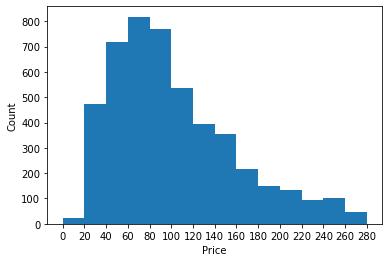

In [23]:
bins = np.arange(0, 300, 20)
plt.hist(data=df_analytics, x='price', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Price');
plt.ylabel('Count');

We can conclude that there is more airbnbs with price between 60 and 80 dollars

Now, look at the location, what are the latitude and longitude more common in the dataset?

In [24]:
df_analytics['latitude'].describe()

count    4897.000000
mean       41.900426
std         0.060715
min        41.651560
25%        41.870530
50%        41.906520
75%        41.942010
max        42.022510
Name: latitude, dtype: float64

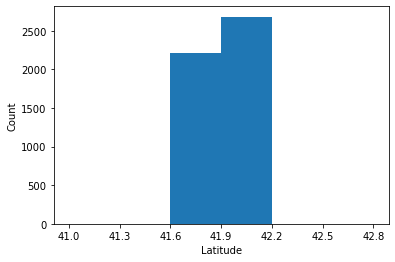

In [25]:
bins = np.arange(41, df_analytics['latitude'].max()+1 , 0.3)
plt.hist(data=df_analytics, x='latitude', bins=bins);
plt.xticks(bins);
plt.xlabel('Latitude');
plt.ylabel('Count');

We can conclude that the most airbnbs are located between latitude 41.9 and 42.2.

In [26]:
df_analytics['longitude'].describe()

count    4897.000000
mean      -87.667435
std         0.043242
min       -87.845270
25%       -87.691550
50%       -87.664820
75%       -87.637040
max       -87.537520
Name: longitude, dtype: float64

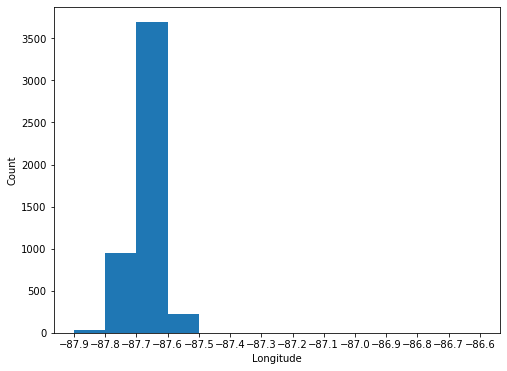

In [27]:
plt.rcParams['figure.figsize'] = 8, 6
bins = np.arange(-87.9, df_analytics['longitude'].max()+1 , 0.1)
plt.hist(data=df_analytics, x='longitude', bins=bins);
plt.xticks(bins);
plt.xlabel('Longitude');
plt.ylabel('Count');

We can conclude that the most airbnbs are located between longitude -87.7 and -87.6.

To sum up, the most commom airbnb is located between (41.9, -87.7) and (42.2, -87.6).

Now, look at the room type, which room type is more common in the dataset?

In [28]:
df_analytics['room_type'].value_counts()

Entire home/apt    3225
Private room       1538
Shared room          76
Hotel room           58
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Number of Airbnbs over Room type')

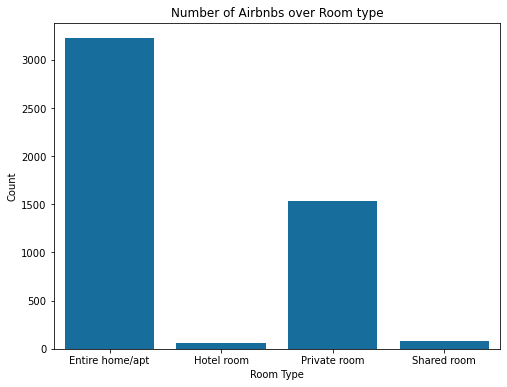

In [29]:
base_color = sb.color_palette('colorblind')[0]
sb.countplot(data=df_analytics, x='room_type', color=base_color);
plt.xlabel('Room Type');
plt.ylabel('Count');
plt.title('Number of Airbnbs over Room type')

We can conclude that there is more "Entire home/apt" in the dataset.

Finally, the last question to answer: Which host has more airbnbs in the dataset?

Text(0.5, 1.0, 'Number of Airbnbs over Host id')

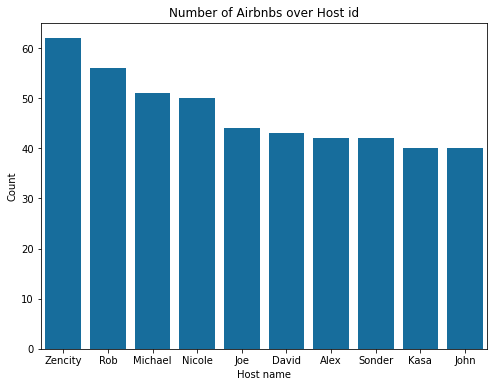

In [30]:
base_color = sb.color_palette('colorblind')[0]
sb.countplot(data=df_analytics, x='host_name', color=base_color, order = df_analytics['host_name'].value_counts().head(10).index);
plt.xlabel('Host name');
plt.ylabel('Count');
plt.title('Number of Airbnbs over Host id')

The host called Zencity is the host that has more airbnb in Chicago.

Text(0.5, 1.0, 'Number of Airbnbs over Neighbourhood')

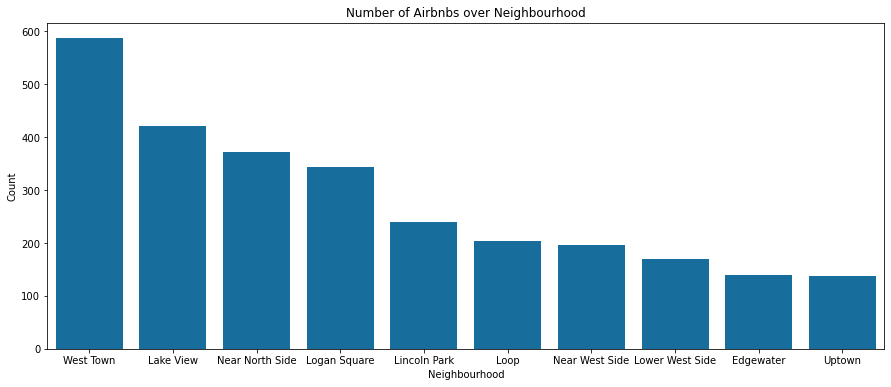

In [31]:
plt.rcParams['figure.figsize'] = 15, 6
base_color = sb.color_palette('colorblind')[0]
sb.countplot(data=df_analytics, x='neighbourhood', color=base_color, order = df_analytics['neighbourhood'].value_counts().head(10).index);
plt.xlabel('Neighbourhood');
plt.ylabel('Count');
plt.title('Number of Airbnbs over Neighbourhood')

There is more airbnbs in West Town.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There are some insights about:
- There is more airbnbs with price between 60 and 80 dollars.
- The most airbnbs are located between latitude 41.9 and 42.2.
- The most airbnbs are located between longitude -87.7 and -87.6.
- The most commom airbnb is located between (41.9, -87.7) and (42.2, -87.6).
- There is more "Entire home/apt" in the dataset.
- The host called Zencity is the host that has more airbnb in Chicago.
- There is more airbnbs in West Town.


No transformation was needed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of price was an unsual, with a massive volume up to 300 dollars, so I dropped the outliers usign .query(), for analyze the main cases.


## Bivariate Exploration

Relation between Price and Neighbourhood

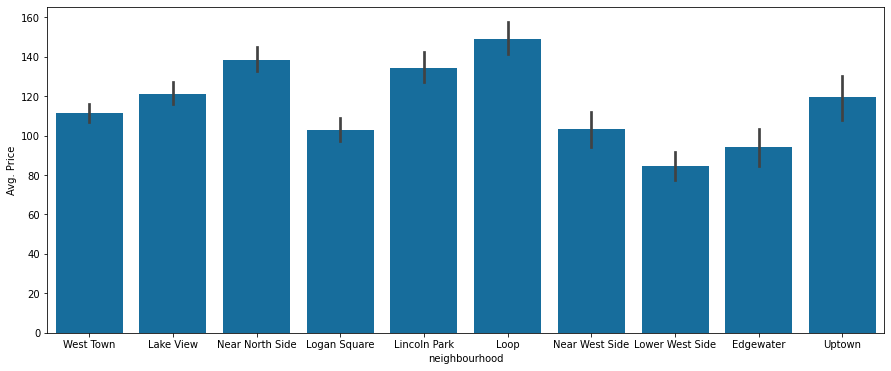

In [32]:
sb.barplot(data=df_analytics, x='neighbourhood', y='price', color=base_color, order = df_analytics['neighbourhood'].value_counts().head(10).index);
plt.xlabel('neighbourhood');
plt.ylabel('Avg. Price');

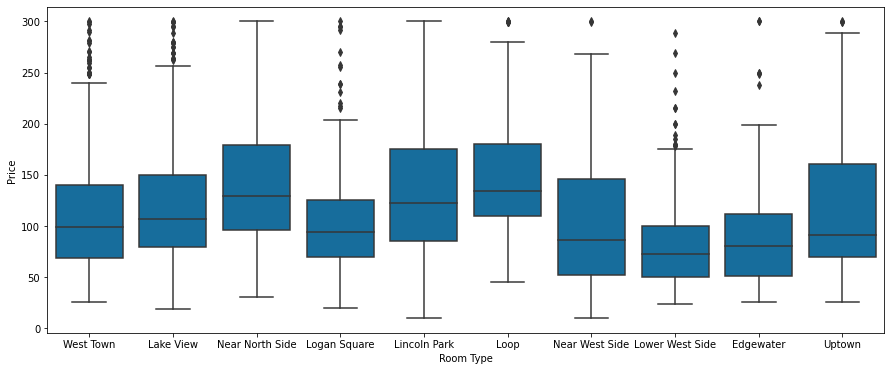

In [33]:
sb.boxplot(data=df_analytics, x='neighbourhood', y='price', color=base_color,order = df_analytics['neighbourhood'].value_counts().head(10).index );
plt.xlabel('Room Type');
plt.ylabel('Price');

The airbnbs located on Loop, Near Noth Side, and Lincoln Park are the most expensive.

Relation between Price and Room Type

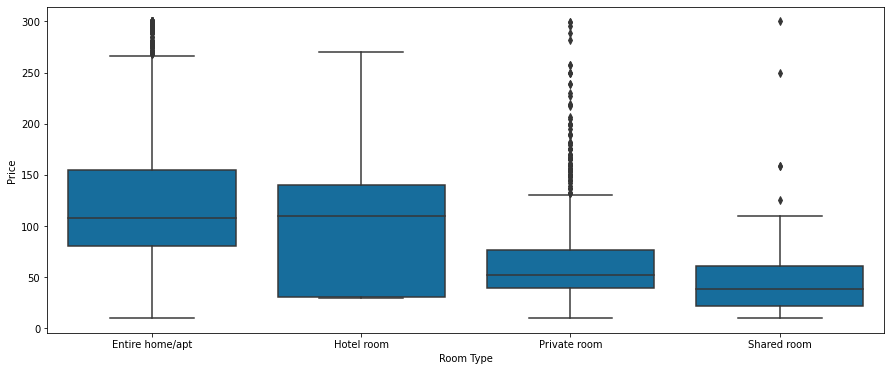

In [34]:
sb.boxplot(data=df_analytics, x='room_type', y='price', color=base_color );
plt.xlabel('Room Type');
plt.ylabel('Price');

We can conclude that the room type "Entire home/apt" is the most expensive. It's possible to see that Hotel room has the most variable price, ranging from less than 50 to almost 150.

Relation between room type and neighbourhood

In [35]:
df_analytics_order = df_analytics['neighbourhood'].value_counts().head(6)
neig = list(df_analytics_order.index)

df_analytics_order2 = df_analytics.query('neighbourhood == "'+neig[0]+'" or neighbourhood == "'+neig[1]+'" or neighbourhood == "'+neig[2]+'" or neighbourhood == "'+neig[3]+'" or neighbourhood == "'+neig[4]+'" or neighbourhood == "'+neig[5]+'"')
df_analytics_order2.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
5,10945,The Biddle House (#1),33004,At Home Inn,Lincoln Park,41.91183,-87.64000,Entire home/apt,115,4,19,2020-08-06,0.24,9,325
6,12068,Chicago GOLD COAST 1 Bedroom Condo,40731,Dominic,Near North Side,41.90452,-87.63320,Entire home/apt,99,5,9,2019-01-14,0.13,1,316
7,12140,Lincoln Park Guest House,46734,Sharon And Robert,Lincoln Park,41.92335,-87.64951,Private room,289,2,4,2018-10-17,0.06,1,179


<AxesSubplot:xlabel='neighbourhood', ylabel='count'>

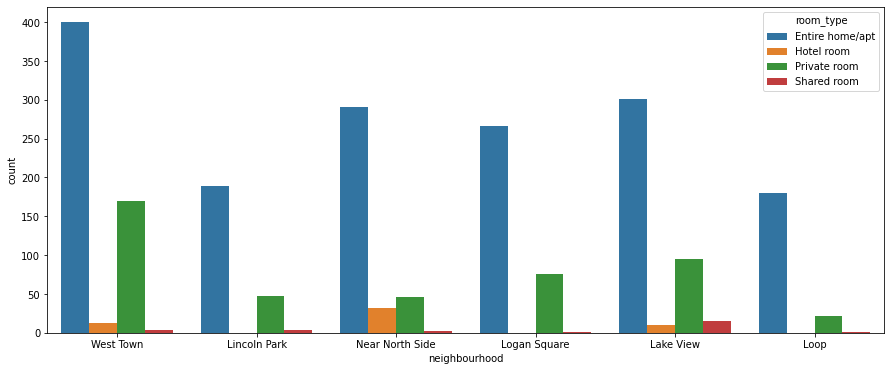

In [36]:
sb.countplot(data = df_analytics_order2, x = 'neighbourhood', hue = 'room_type')

We can conclude that West Town has the bigger number of Entire home/apt and private room, in number of hotel room, Near North Side has the most, and finally, Lake View has the biger number of shared room.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

When we look on the relationship between price and neighbourhood, the airbnbs located on Loop, Near Noth Side, and Lincoln Park are the most expensive. Now, analyzing price and room type, we can conclude that the room type "Entire home/apt" is the most expensive. It's possible to see that Hotel room has the most variable price, ranging from less than 50 to almost 150. Finally, studing the relation between neighbourhood and room type, we can conclude that West Town has the bigger number of Entire home/apt and private room, in number of hotel room, Near North Side has the most, and finally, Lake View has the biger number of shared room.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It is interesting to see that west Town has the bigger number of entire home/apt, that is the room type most expensive, and the Loop, that has less entire home/apt, have the bigger average price. So, that point need to be clear in the multivariate exploration.


## Multivariate Exploration

How does the distribution of price between latitude and longitude?

/Users/brunobarreto/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

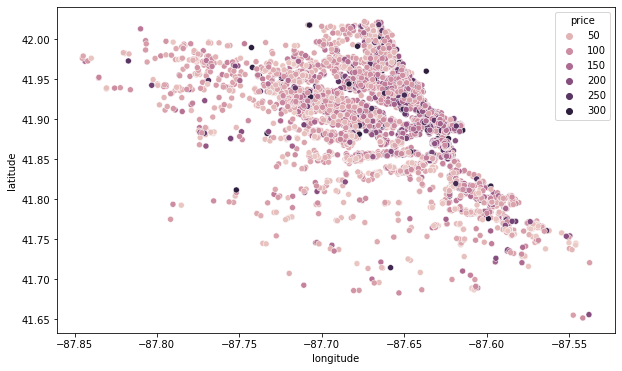

In [37]:
plt.figure(figsize=(10,6))
sb.scatterplot(df_analytics.longitude,df_analytics.latitude,hue=df_analytics.price)

We can see here that there is a zone that has more expensive airbnbs, this zone is located between -87.65 and -87.60 longitude and 41.85 and 41.90 latitude.

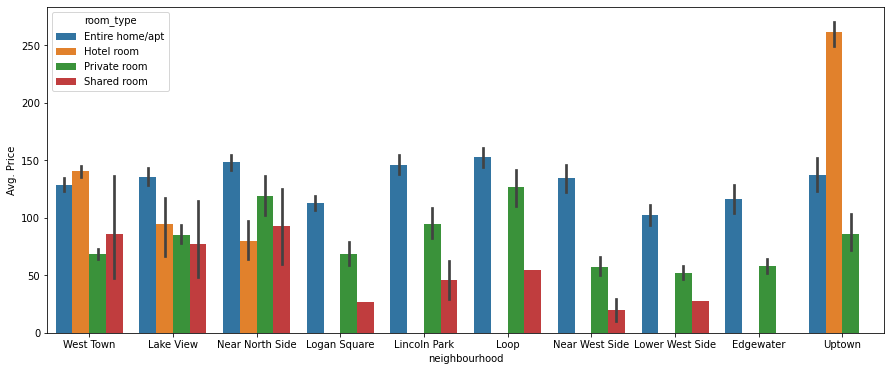

In [46]:
sb.barplot(data=df_analytics, x='neighbourhood', y='price', hue='room_type', order = df_analytics['neighbourhood'].value_counts().head(10).index);
plt.xlabel('neighbourhood');
plt.ylabel('Avg. Price');

Although West Town has more airbnbs and more entire home/apt than Loop, the second has an average price of this room type, which impacts the global average price.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined. Although West Town has more airbnbs and more entire home/apt than Loop, the second has an average price of this room type, which impacts the global average price. Finally, we can see here that there is a zone that has more expensive airbnbs, this zone is located between -87.65 and -87.60 longitude and 41.85 and 41.90 latitude. Perhaps the reason is that this zone is the center of Chicago.

### Were there any interesting or surprising interactions between features?

The relation between neighbors, room type, and the price is very interesting because in univariate exploration we see West Town as the place that has more airbnbs in Chicago. When we look at the bivariate, we can see that Loop is the most expensive, and the entire home/apt is the room type is the most expensive, but West Town has the bigger number of this room type, which makes us confused. Finally, in the multivariate exploration, we can see these three features together in one graph, and understand the behavior.

In [47]:
df_analytics.to_csv('chicago_airbnb_data.csv', index=False)